# Amazon Product Reviews Sentiment Analysis with Python

Amazon is an American multinational corporation that focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence products. But it is mainly known for its e-commerce platform which is one of the biggest online shopping platforms today. There are so many customers buying products from Amazon that today Amazon earns an average of $ 638.1 million per day. So having such a large customer base, it will turn out to be an amazing data science project if we can analyze the sentiments of Amazon product reviews. 

The dataset I’m using for the task of Amazon product reviews sentiment analysis was downloaded from Kaggle. This dataset contains the product reviews of over 568,000 customers who have purchased products from Amazon. So let’s start this task by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

df = pd.read_csv("/Users/gulladhanush/Downloads/Reviews.csv")
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [2]:
data = df.head(1000)  # here we are taking small amount of data

Before moving forward, let’s take a look at some of the information needed from this dataset:

In [3]:
print(data.describe())

                Id  HelpfulnessNumerator  HelpfulnessDenominator        Score  \
count  1000.000000           1000.000000             1000.000000  1000.000000   
mean    500.500000              1.230000                1.653000     4.179000   
std     288.819436              2.690788                3.156034     1.325412   
min       1.000000              0.000000                0.000000     1.000000   
25%     250.750000              0.000000                0.000000     4.000000   
50%     500.500000              0.000000                1.000000     5.000000   
75%     750.250000              1.000000                2.000000     5.000000   
max    1000.000000             43.000000               47.000000     5.000000   

               Time  
count  1.000000e+03  
mean   1.288389e+09  
std    5.093025e+07  
min    1.107821e+09  
25%    1.253945e+09  
50%    1.300752e+09  
75%    1.330927e+09  
max    1.351210e+09  


As this dataset is very large, it contains some missing values, so let’s remove all the rows containing the missing values:

In [4]:
data = data.dropna()

## Sentiment Analysis of Amazon Product Reviews

The Score column of this dataset contains the ratings that customers have given to the product based on their experience with the product. So let’s take a look at the rating breakdown to see how most customers rate the products they buy from Amazon:

In [5]:
ratings = data["Score"].value_counts()
ratings

5    642
4    138
1     98
3     75
2     47
Name: Score, dtype: int64

In [6]:
numbers = ratings.index
numbers

Int64Index([5, 4, 1, 3, 2], dtype='int64')

In [7]:
quantity = ratings.values
quantity

array([642, 138,  98,  75,  47])

In [8]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
custom_colors

['skyblue', 'yellowgreen', 'tomato', 'blue', 'red']

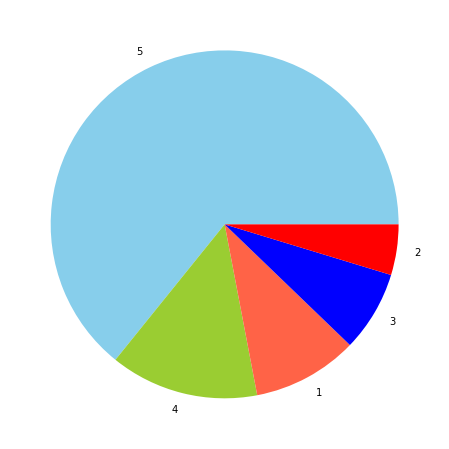

In [9]:
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)

plt.show()

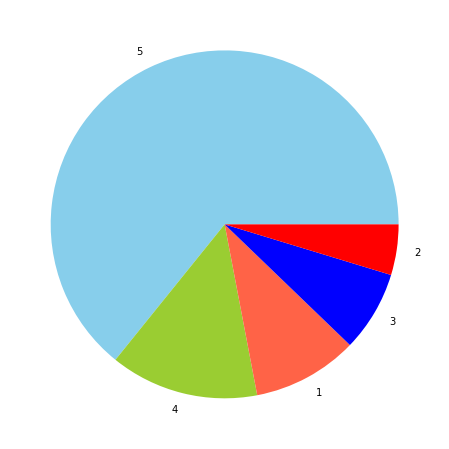

In [10]:
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')

plt.show()

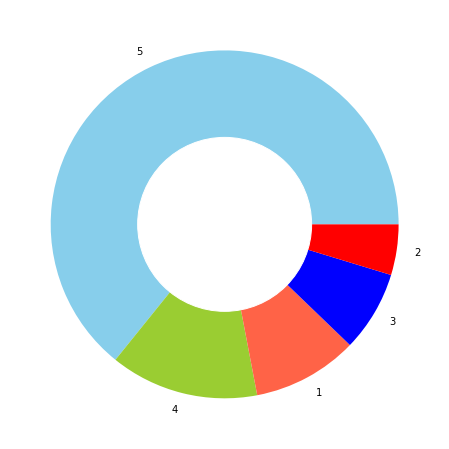

In [11]:
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)

plt.show()

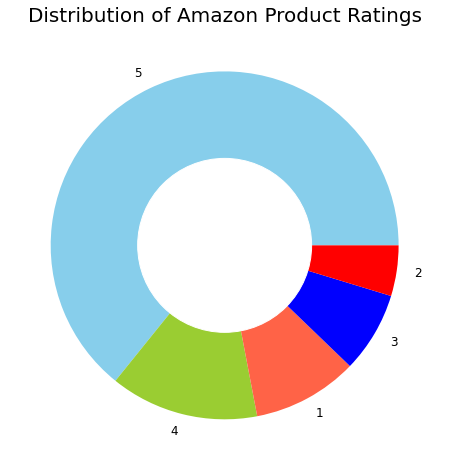

In [12]:
ratings = data["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

According to the figure above, more than half of people rated products they bought from Amazon with 5 stars, which is good. Now, I’m going to add three more columns to this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the customer reviews mentioned in the Text column of the dataset:


# VADER

VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion

# Polarity classification
We won’t try to determine if a sentence is objective or subjective, fact or opinion. Rather, we care only if the text expresses a positive, negative or neutral opinion.

In [13]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Text"]]
print(data.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   


Now let’s see how most people rated the products they bought from Amazon:



In [14]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


So, most people are neutral when submitting their experiences with the products they have purchased from Amazon. Now let’s see the total of all sentiment scores:

In [15]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  191.54800000000014
Negative:  42.99400000000001
Neutral:  765.4539999999996


So we can say that most of the reviews of the products available on Amazon are positive, as the total sentiment scores of Positive and Neural are much higher than Negative scores

## Summary

So this is how we can analyze the sentiments of the product reviews at amazon. There are so many customers buying products from Amazon that today Amazon earns an average of $ 638.1 million per day. So having such a large customer base, it will turn out to be an amazing data science project if we can analyze the sentiments of Amazon product reviews